In [111]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression , Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore') 


In [112]:
diabetes_data = pd.read_csv('../dataset/diabetes.csv') 
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [113]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## check missing values 

In [114]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### check duplicates

In [115]:
diabetes_data.duplicated().sum()

np.int64(0)

### checkl and visulaize outliers 

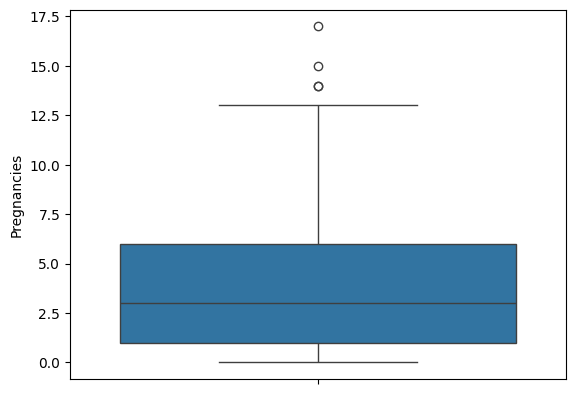

numbner of outliers in Pregnancies is 4


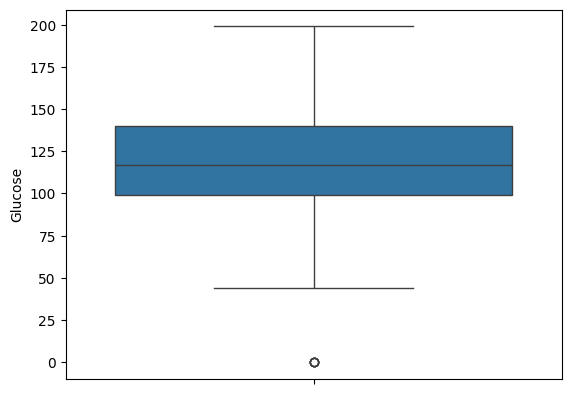

numbner of outliers in Glucose is 5


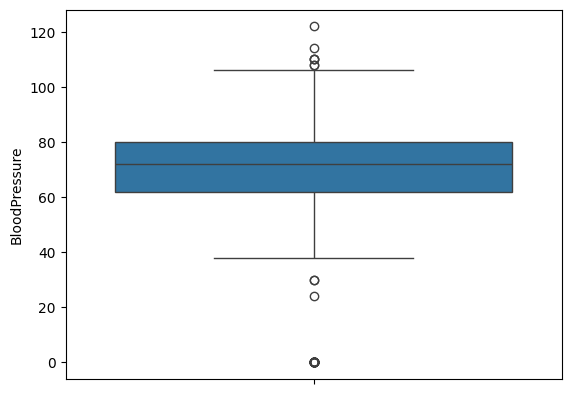

numbner of outliers in BloodPressure is 45


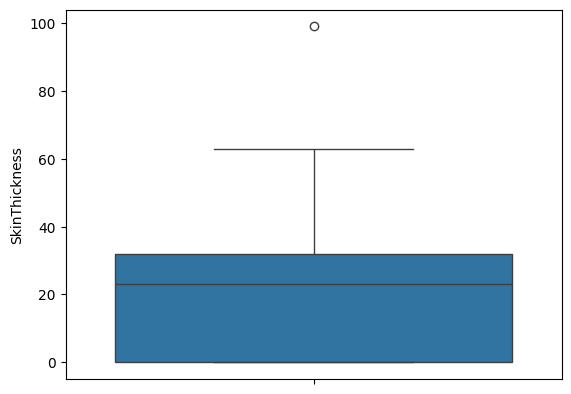

numbner of outliers in SkinThickness is 1


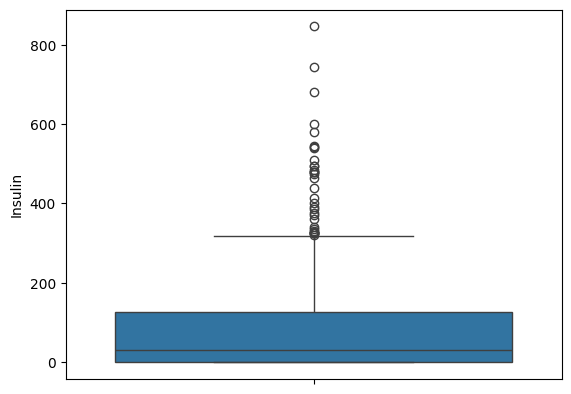

numbner of outliers in Insulin is 34


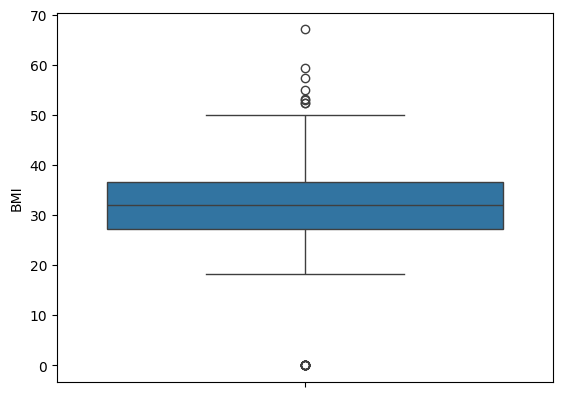

numbner of outliers in BMI is 19


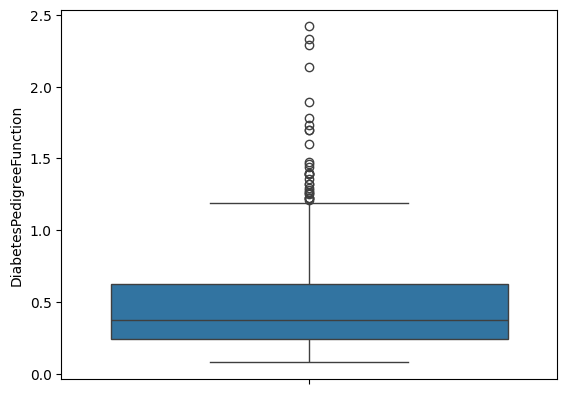

numbner of outliers in DiabetesPedigreeFunction is 29


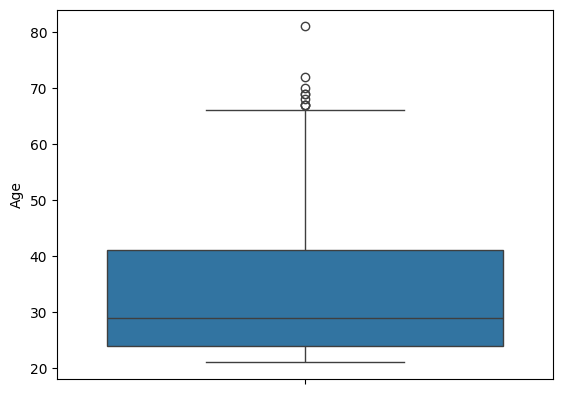

numbner of outliers in Age is 9


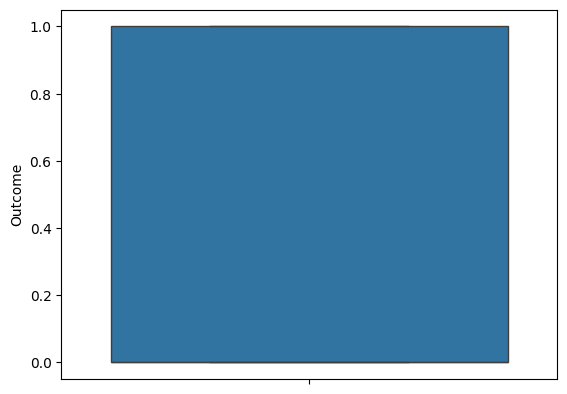

numbner of outliers in Outcome is 0


In [116]:
num_column = diabetes_data.select_dtypes(include='number') .columns 

for col in diabetes_data.columns: 
    Q1 = diabetes_data[col].quantile(0.25)
    Q3 = diabetes_data[col].quantile(0.75) 
    iqr = Q3 - Q1  
    upper = Q3 + 1.5 * iqr 
    lower = Q1 - 1.5 * iqr 
    sns.boxplot(diabetes_data[col])
    plt.show() 
    outliers = diabetes_data[(diabetes_data[col] < lower) | (diabetes_data[col] > upper)]
    print(f'numbner of outliers in {col} is {len(outliers[col])}')




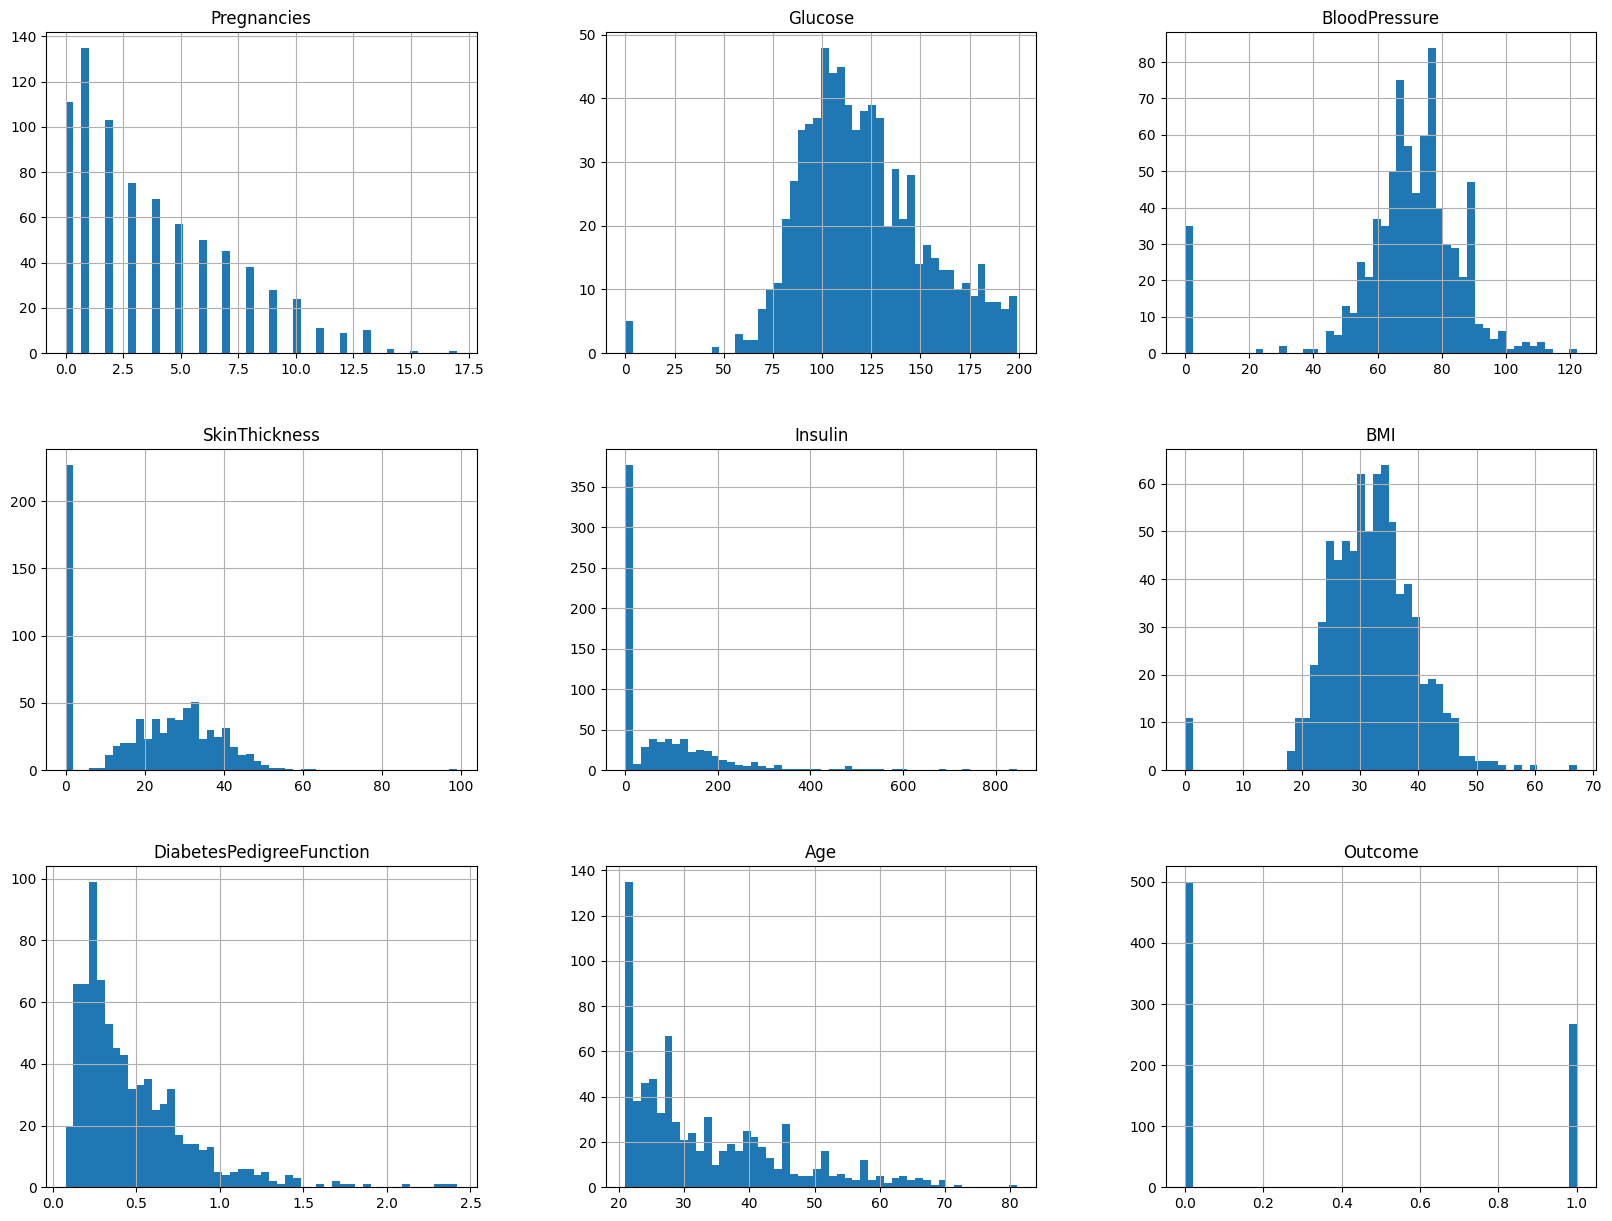

In [117]:

diabetes_data.hist(bins = 50 ,figsize=(20,15) ) 
plt.show()

# question 1 : How many patients have the diabetes versus don't have it?

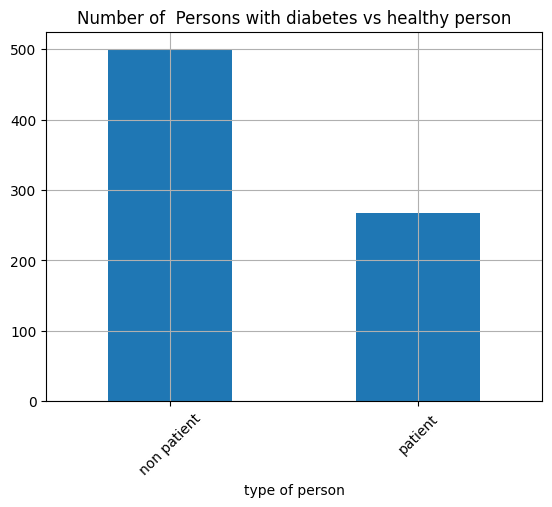

In [118]:
diabetes_data['Outcome'].value_counts().plot(kind='bar') 
plt.xlabel('type of person') 
plt.xticks( ticks=[0,1], labels = [ 'non patient', 'patient'], rotation = 45)
plt.grid(True)
plt.title('Number of  Persons with diabetes vs healthy person')
plt.show()

# correlation heatmap

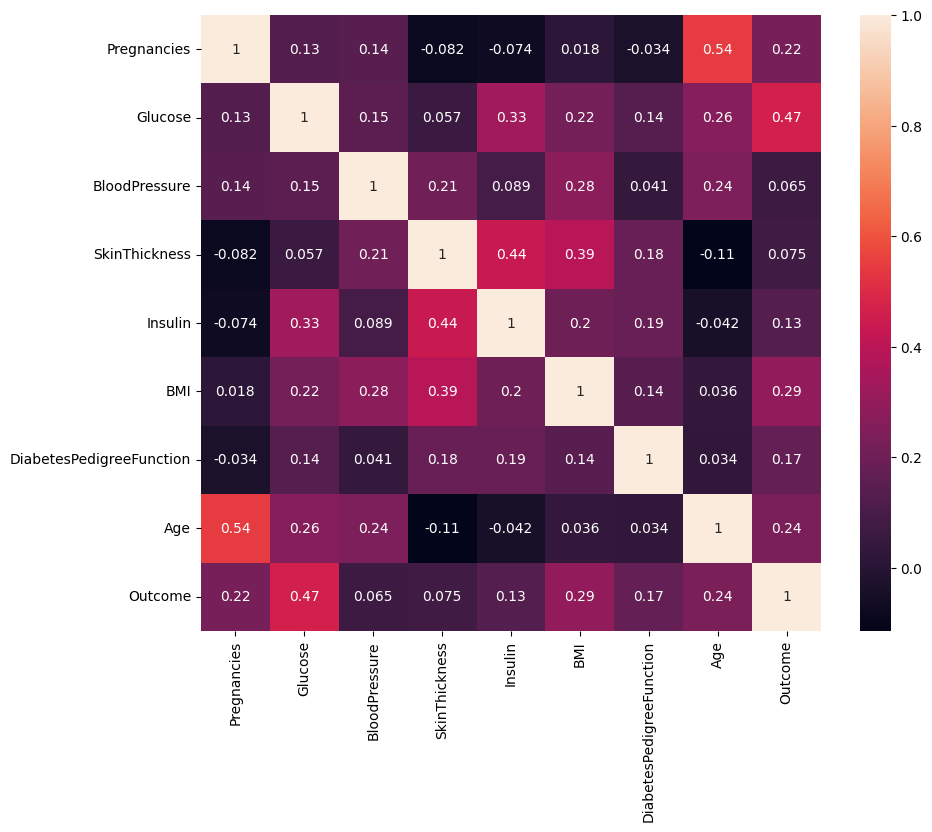

In [119]:
plt.figure(figsize=(10,8))
num_column = diabetes_data.select_dtypes(include='number').columns 
sns.heatmap(data= diabetes_data.corr(numeric_only=True) , annot=True) 
plt.show()

# pair plot of data

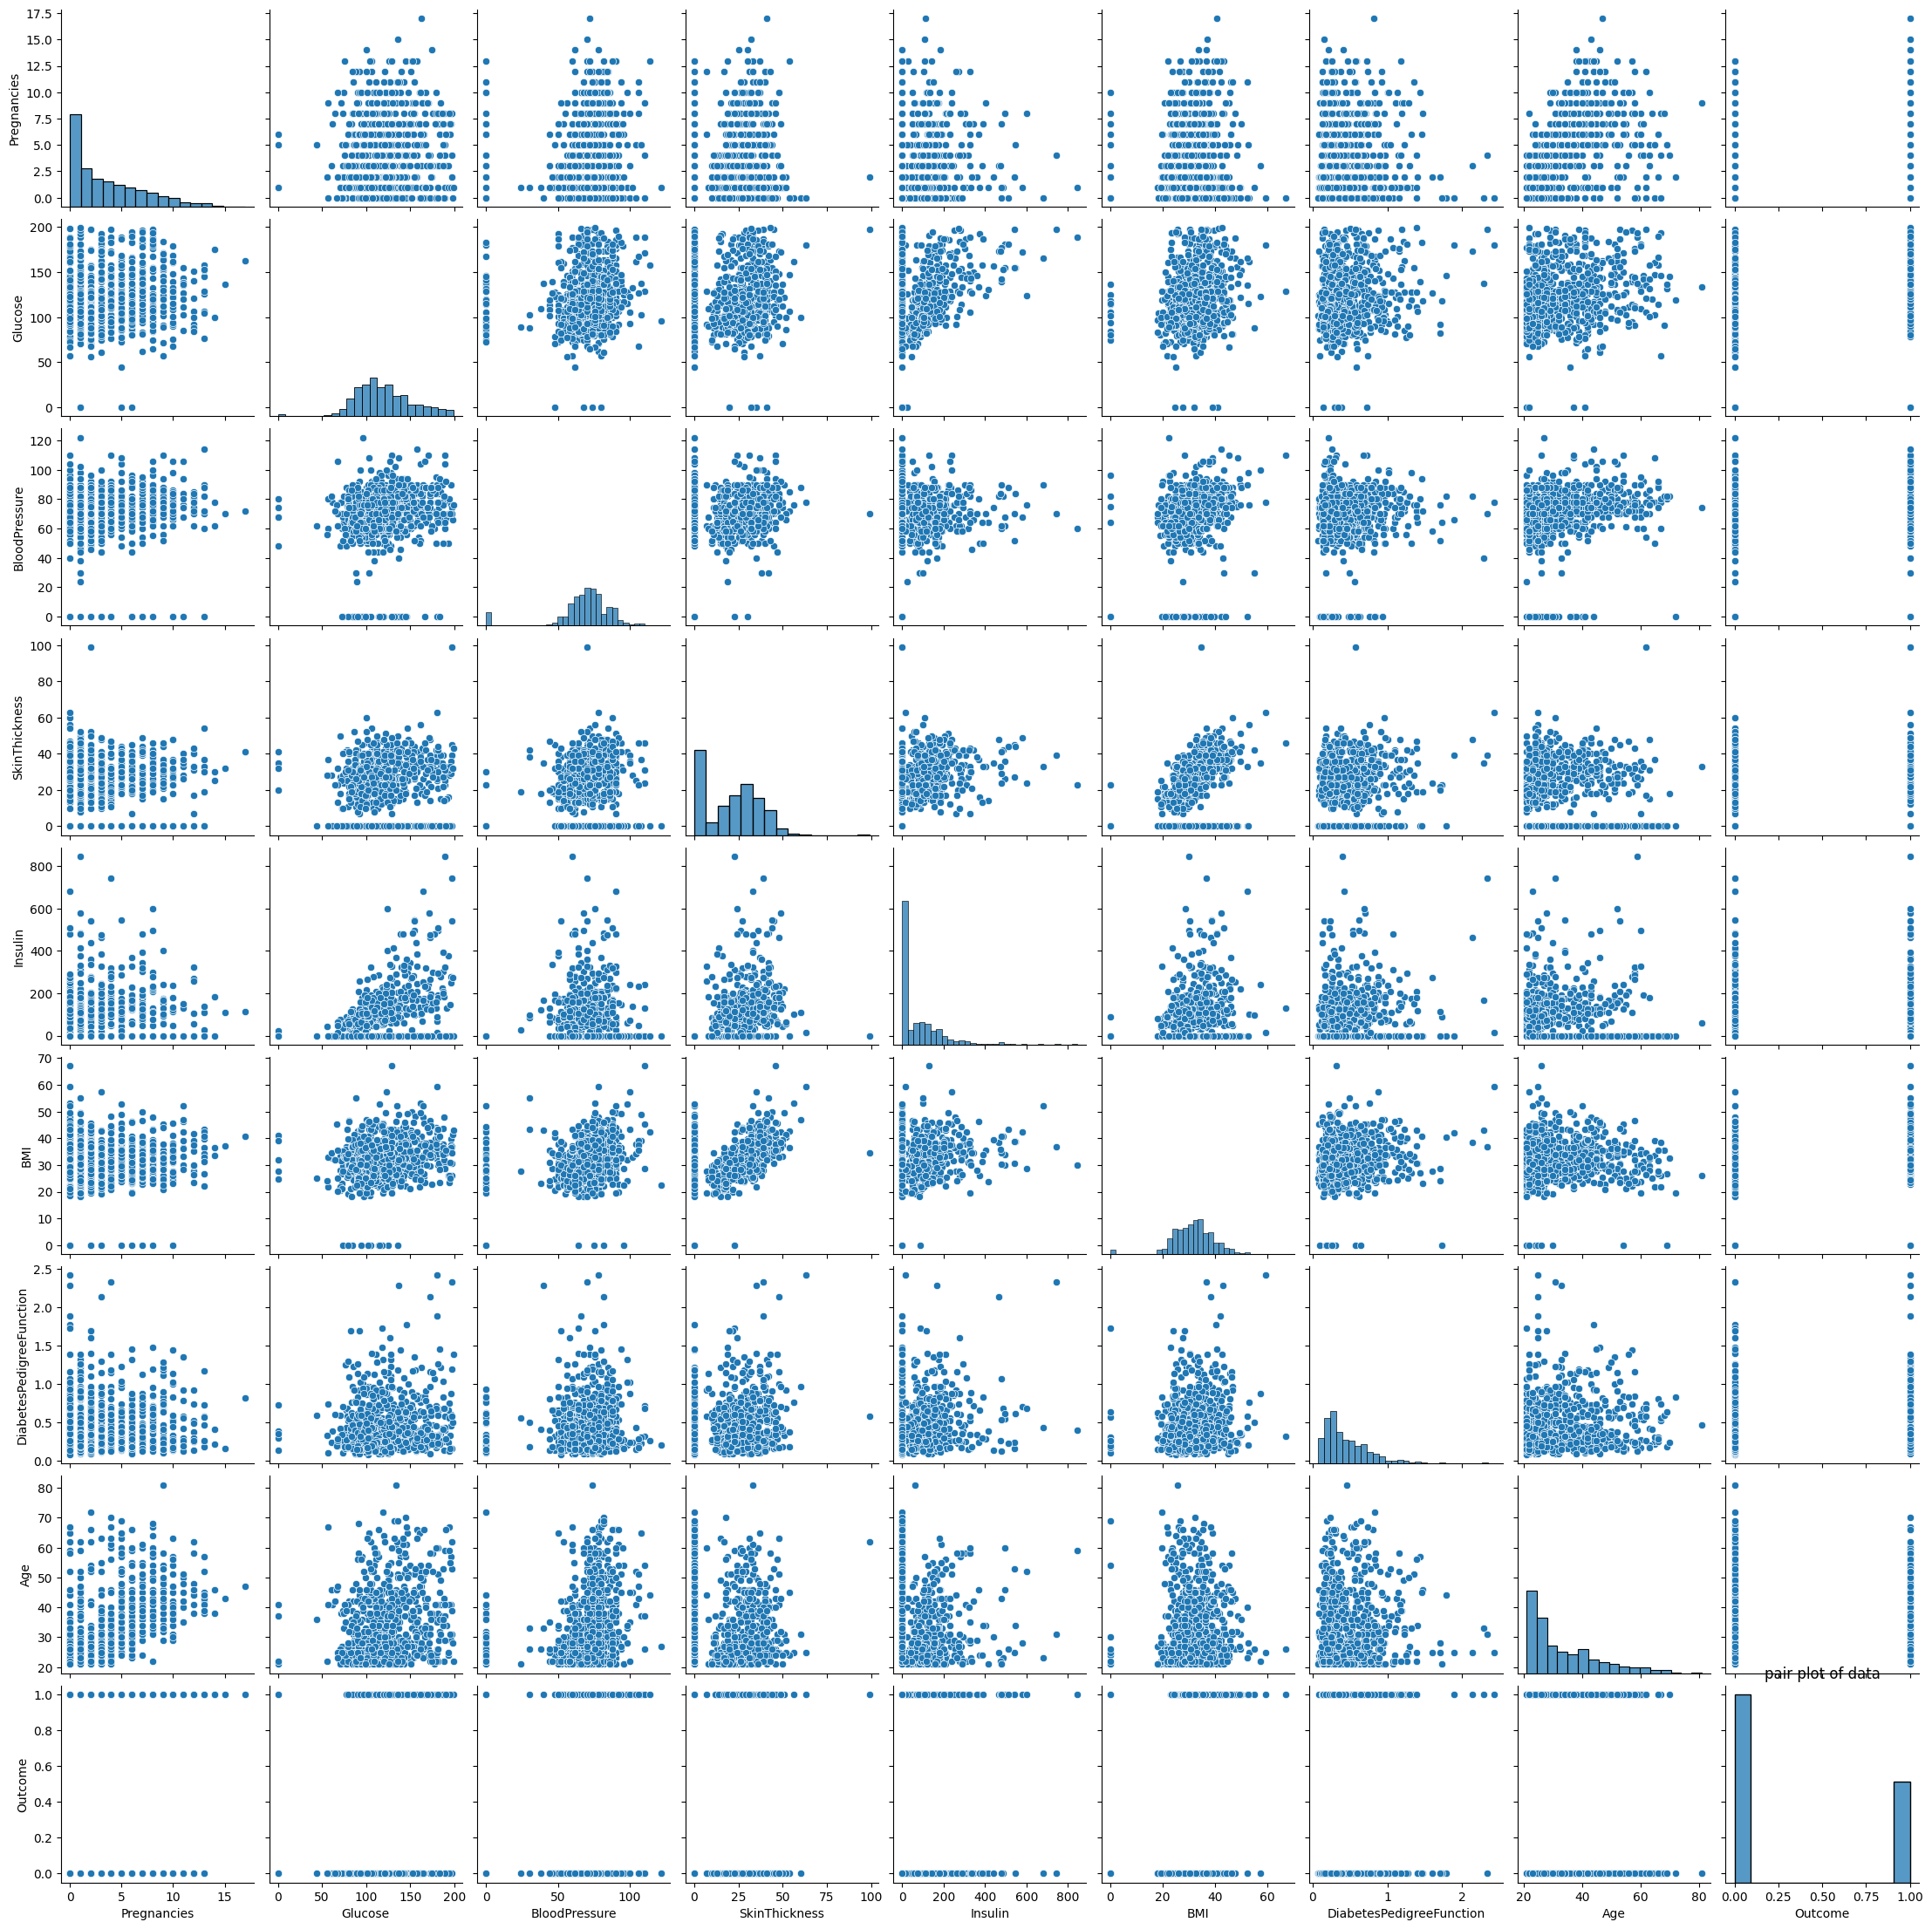

In [120]:
sns.pairplot(data=diabetes_data)
plt.title('pair plot of data')
plt.show()

In [121]:
diabetes_data['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

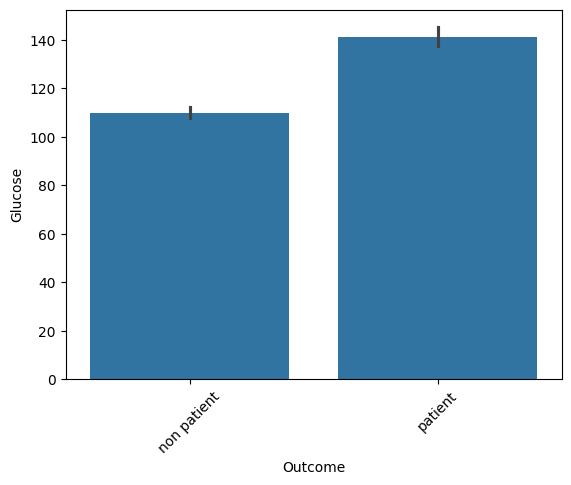

In [122]:
sns.barplot(data=diabetes_data , x = 'Outcome' , y = 'Glucose')
plt.xticks(ticks=[0, 1], labels=['non patient', 'patient'], rotation=45)
plt.show()

### now will split data in to features and target column 

In [123]:
features_col = diabetes_data.drop('Outcome' , axis=1)
target_col = diabetes_data['Outcome']

In [124]:
features_col


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [125]:
features_col.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [126]:
# now will handel imbalanced data 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [127]:
features_col , target_col = smote.fit_resample(features_col ,target_col)

In [128]:
target_col.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [129]:
features_col_train , features_col_test , target_col_train , target_col_test = train_test_split(features_col , target_col , test_size=0.2 , random_state=42 , shuffle=True)

In [130]:
print(features_col_train.shape)
print(target_col_train.shape)

(800, 8)
(800,)


In [131]:
print(features_col_test.shape)
print(target_col_test.shape)



(200, 8)
(200,)


# now will bulid models and train it 


In [132]:
from catboost import CatBoostClassifier 
import lightgbm as lgb
models = {
    'Perceptron Model' : Perceptron(),
    'LogisticRegression Model' : LogisticRegression(),
    'SVC model' : SVC(),
    'KNeighborsClassifier Model' : KNeighborsClassifier(),
    'DecisionTreeClassifier Model' : DecisionTreeClassifier(),
    'RandomForestClassifier Model' : RandomForestClassifier(),
    'AdaBoostClassifier Model' : AdaBoostClassifier(),
    'CatBoostClassifier Model' : CatBoostClassifier(),
    'XGBClassifier Model' : XGBClassifier(),
    'lightgbm Model' : lgb.LGBMClassifier() , 
    'GradientBoostingClassifier model ':GradientBoostingClassifier(),
    'BaggingClassifier model' : BaggingClassifier()
}

In [134]:
#visualize metrics of train,test of models 
from sklearn.metrics import classification_report , confusion_matrix 
def visualize_metrics(actual , predicted):
    plt.figure(figsize=(8,5))
    sns.heatmap(confusion_matrix(actual , predicted) , annot=True)
    plt.title('Confusion Metrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [135]:
#Train the model, generate predictions, and evaluatethe model 
def impute_model(model) : 
    model.fit(features_col_train , target_col_train)
    train_predict = model.predict(features_col_train)
    test_predict = model.predict(features_col_test)

    print('==> Train Metrix : ')
    print('classification_report : \n' , classification_report(target_col_train , train_predict))
    visualize_metrics(target_col_train , train_predict)
    print('')

    print('==> Test Metrix : ')
    print('classification_report : \n' , classification_report(target_col_test , test_predict))
    visualize_metrics(target_col_test , test_predict)
    print('')
    

============== Perceptron Model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.08      0.14       401
           1       0.52      0.99      0.68       399

    accuracy                           0.54       800
   macro avg       0.73      0.54      0.41       800
weighted avg       0.73      0.54      0.41       800



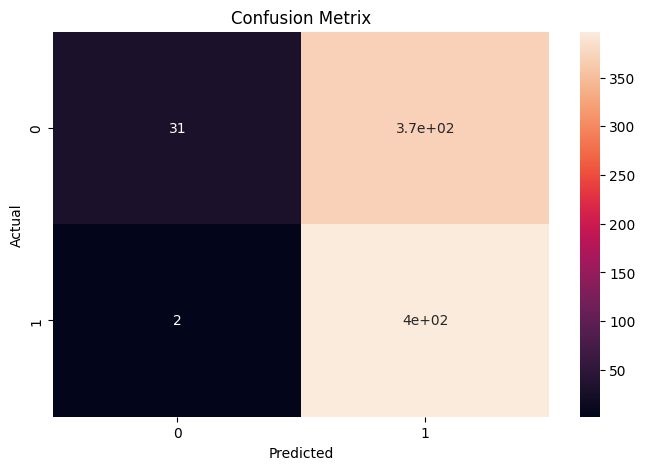


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        99
           1       0.51      1.00      0.68       101

    accuracy                           0.52       200
   macro avg       0.76      0.51      0.36       200
weighted avg       0.75      0.52      0.36       200



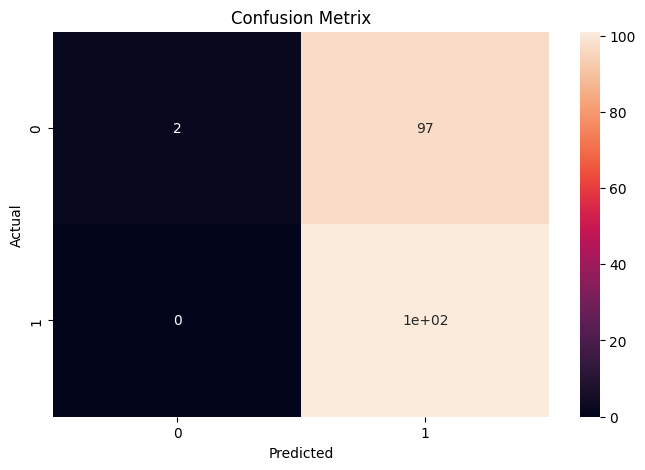


============== LogisticRegression Model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       401
           1       0.76      0.71      0.73       399

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



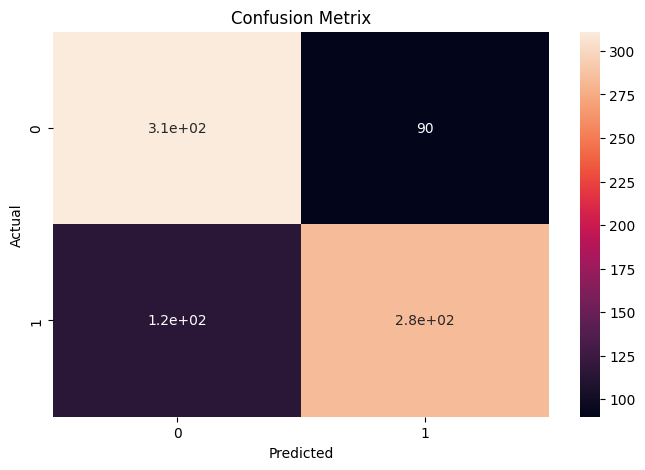


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.76      0.81      0.78       101

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



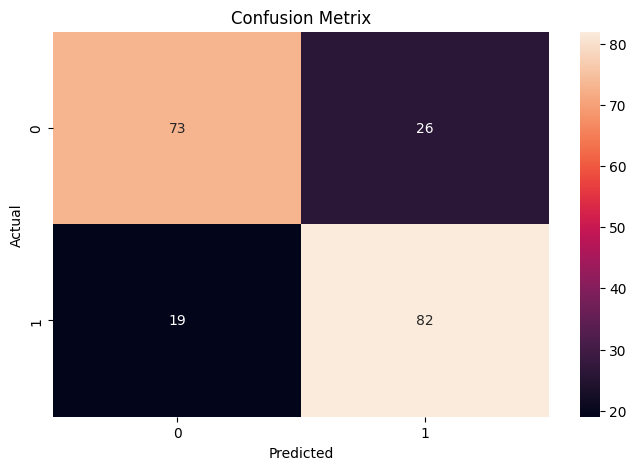


============== SVC model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74       401
           1       0.75      0.67      0.71       399

    accuracy                           0.72       800
   macro avg       0.73      0.72      0.72       800
weighted avg       0.73      0.72      0.72       800



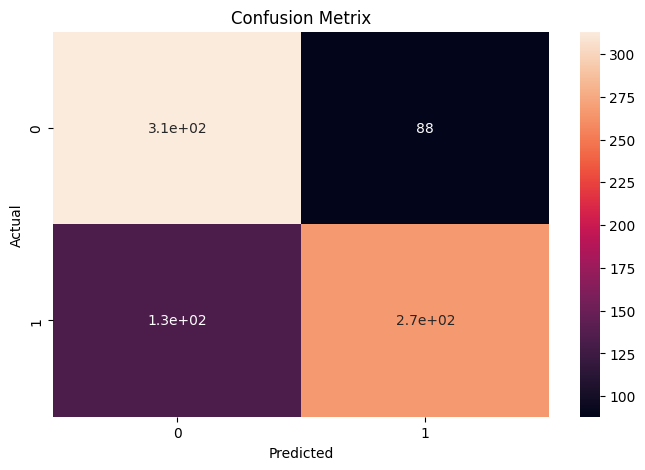


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        99
           1       0.77      0.73      0.75       101

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



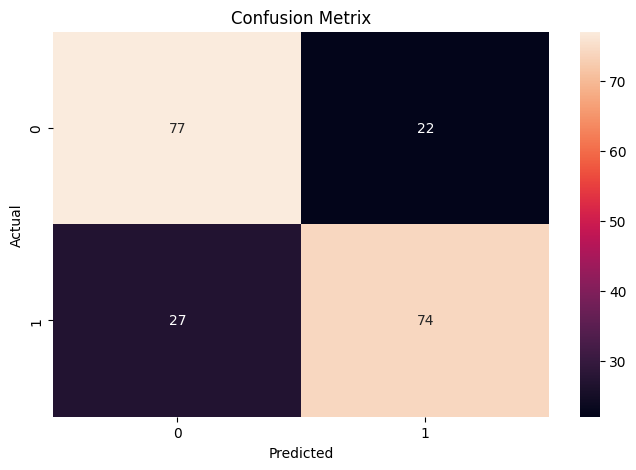


============== KNeighborsClassifier Model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       401
           1       0.78      0.88      0.83       399

    accuracy                           0.81       800
   macro avg       0.82      0.82      0.81       800
weighted avg       0.82      0.81      0.81       800



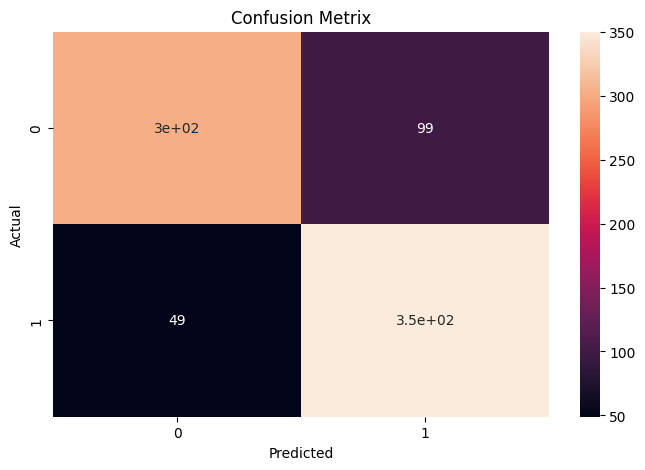


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        99
           1       0.71      0.86      0.78       101

    accuracy                           0.75       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200



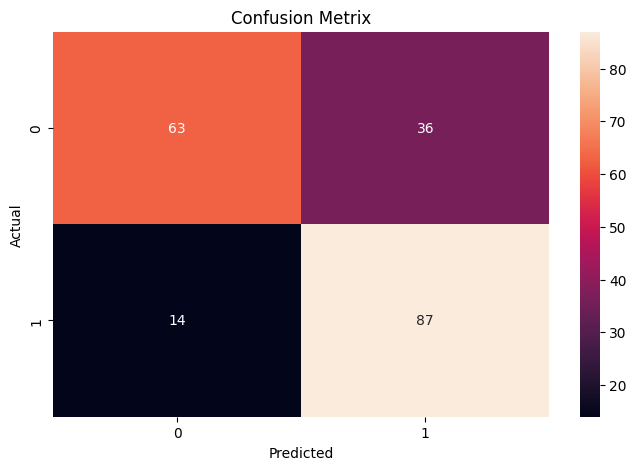


============== DecisionTreeClassifier Model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       399

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



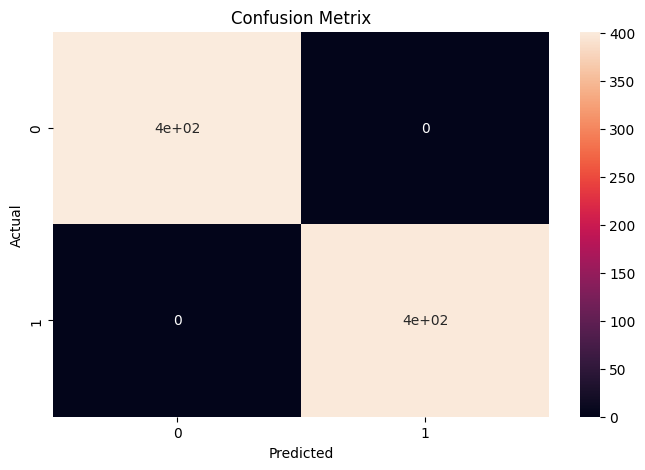


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.78      0.80      0.79       101

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



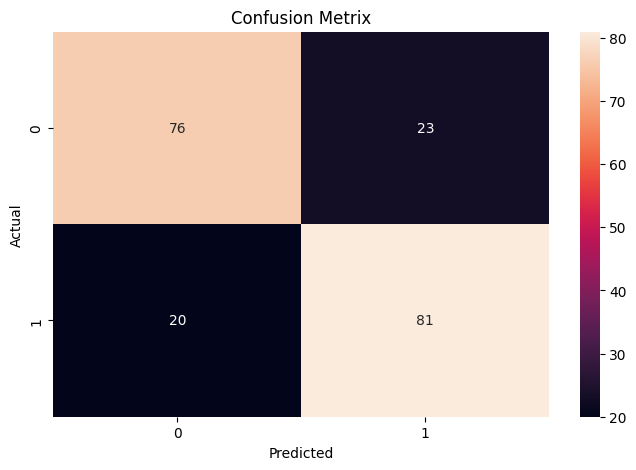


============== RandomForestClassifier Model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       399

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



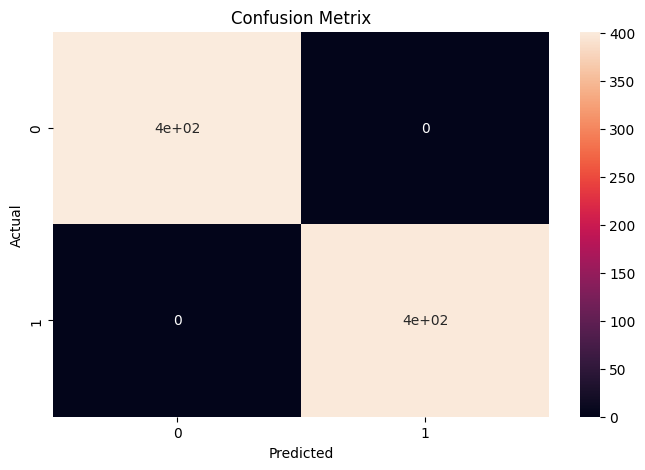


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.77      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



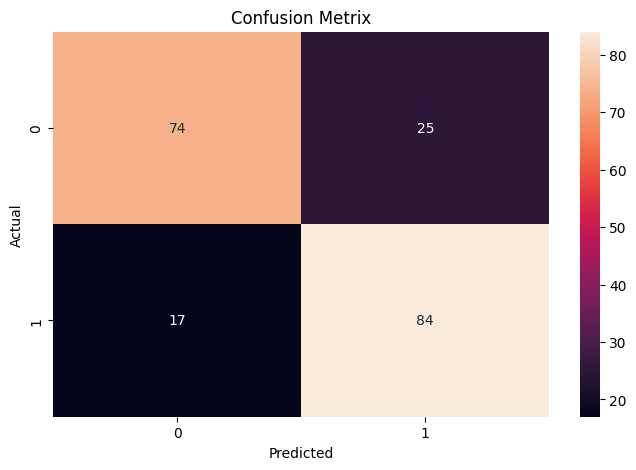


============== AdaBoostClassifier Model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       401
           1       0.82      0.83      0.82       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



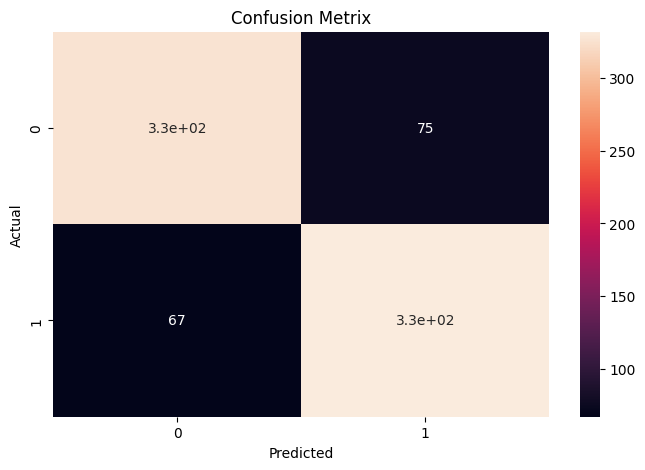


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74        99
           1       0.74      0.80      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200



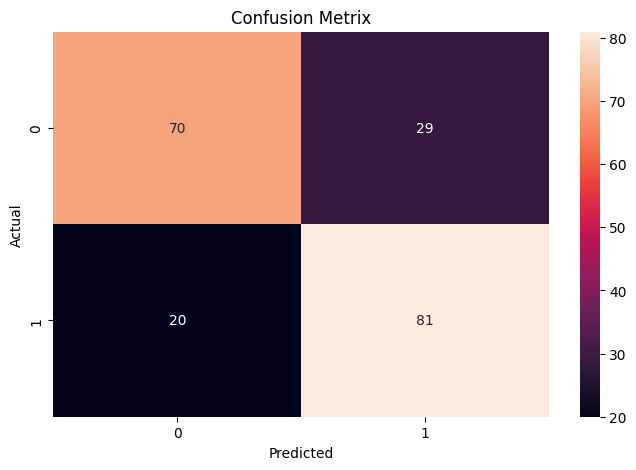


============== CatBoostClassifier Model ==============
Learning rate set to 0.009366
0:	learn: 0.6879383	total: 111ms	remaining: 1m 50s
1:	learn: 0.6823889	total: 113ms	remaining: 56.3s
2:	learn: 0.6776281	total: 115ms	remaining: 38.1s
3:	learn: 0.6729717	total: 116ms	remaining: 29s
4:	learn: 0.6690312	total: 118ms	remaining: 23.5s
5:	learn: 0.6640778	total: 120ms	remaining: 19.9s
6:	learn: 0.6597980	total: 122ms	remaining: 17.3s
7:	learn: 0.6556820	total: 124ms	remaining: 15.4s
8:	learn: 0.6516076	total: 126ms	remaining: 13.9s
9:	learn: 0.6477327	total: 128ms	remaining: 12.7s
10:	learn: 0.6433359	total: 130ms	remaining: 11.7s
11:	learn: 0.6393924	total: 132ms	remaining: 10.8s
12:	learn: 0.6349792	total: 134ms	remaining: 10.1s
13:	learn: 0.6310216	total: 136ms	remaining: 9.55s
14:	learn: 0.6271677	total: 138ms	remaining: 9.04s
15:	learn: 0.6228313	total: 140ms	remaining: 8.59s
16:	learn: 0.6185706	total: 142ms	remaining: 8.2s
17:	learn: 0.6150209	total: 144ms	remaining: 7.85s
18:	lear

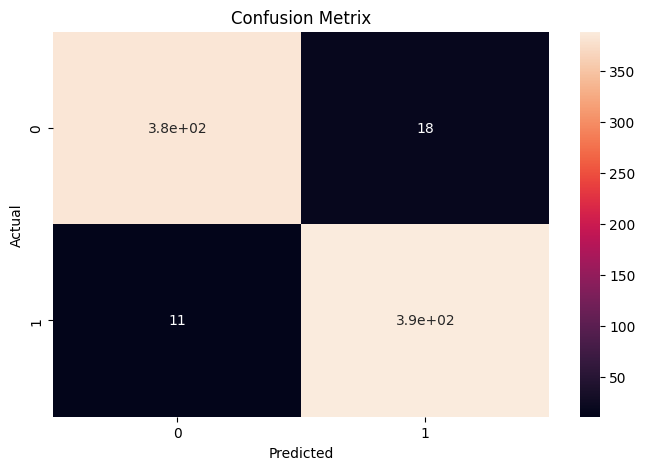


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.80      0.71      0.75        99
           1       0.74      0.82      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



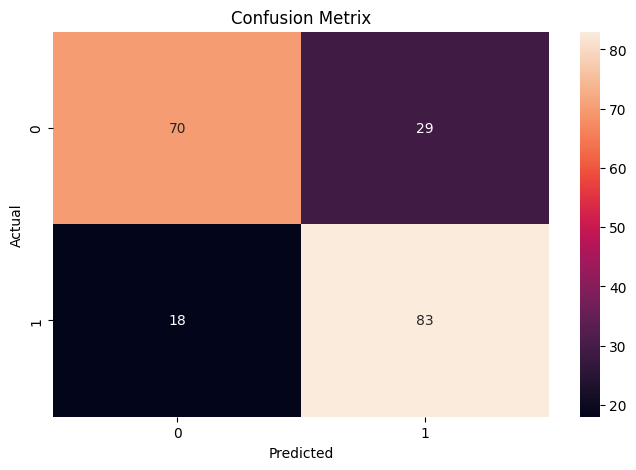


============== XGBClassifier Model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       399

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



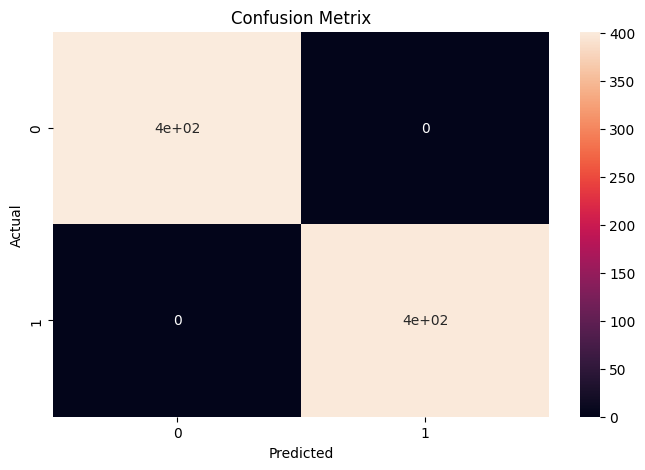


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.77      0.84      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



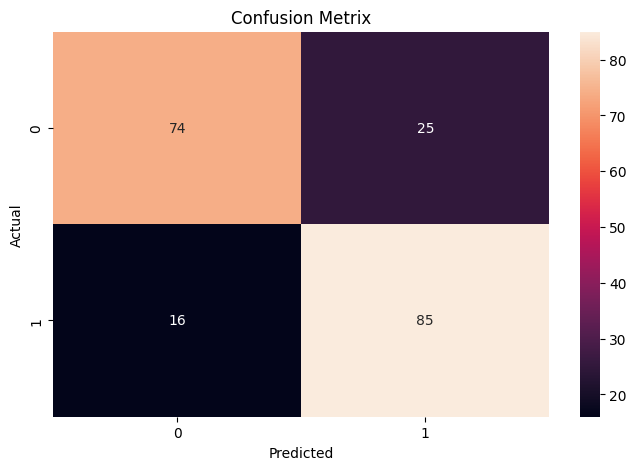


============== lightgbm Model ==============
[LightGBM] [Info] Number of positive: 399, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 885
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.005000
[LightGBM] [Info] Start training from score -0.005000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

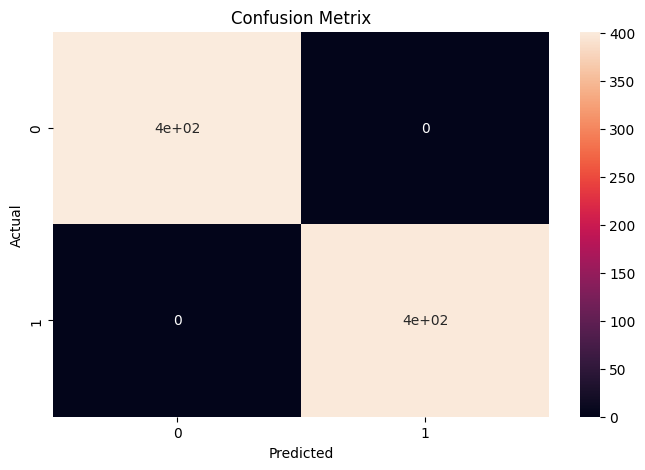


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.76      0.80      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



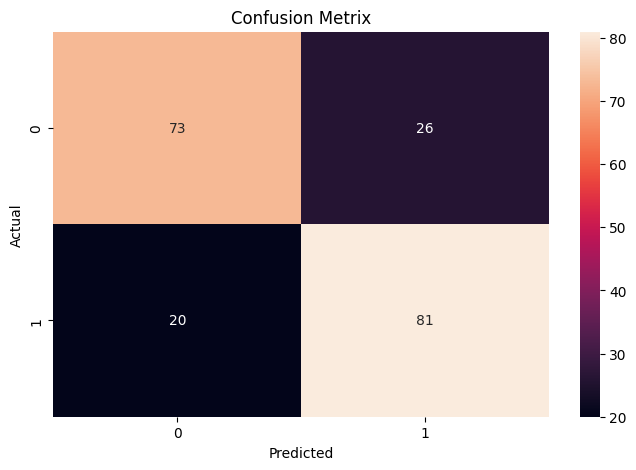


============== GradientBoostingClassifier model  ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       401
           1       0.91      0.93      0.92       399

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



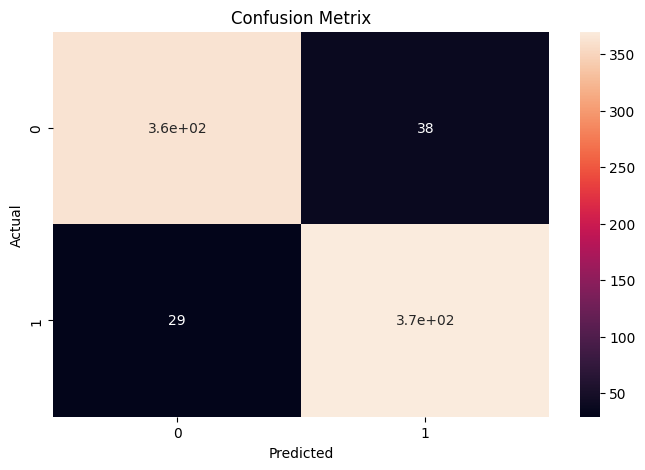


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        99
           1       0.76      0.80      0.78       101

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



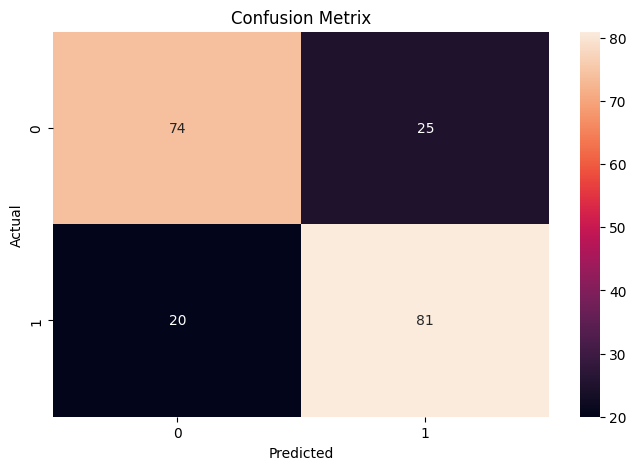


============== BaggingClassifier model ==============
==> Train Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       401
           1       0.99      0.98      0.99       399

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



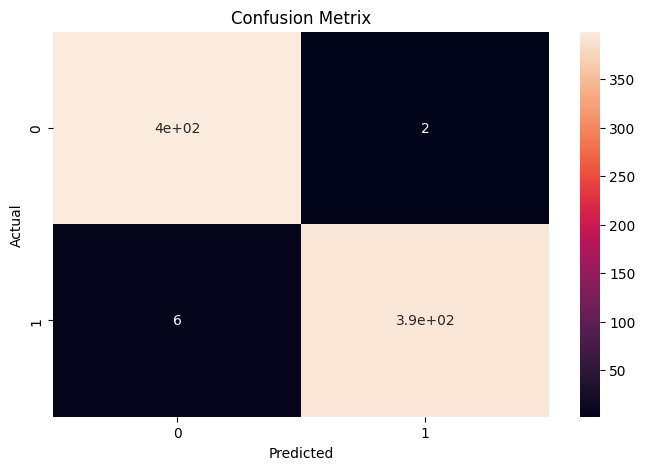


==> Test Metrix : 
classification_report : 
               precision    recall  f1-score   support

           0       0.77      0.78      0.77        99
           1       0.78      0.77      0.78       101

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



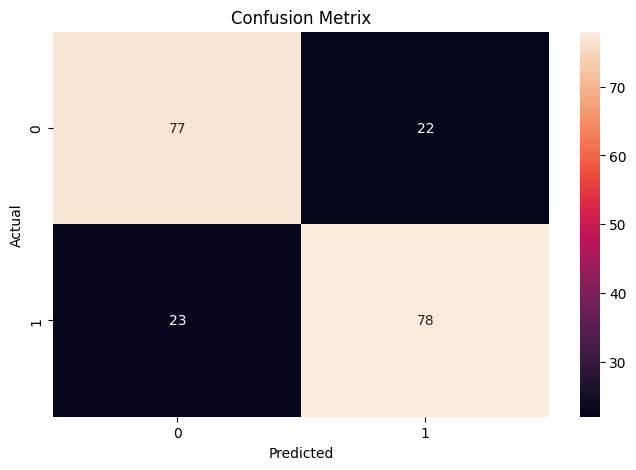

In [136]:
for model_name , model_algo in models.items():
    print(f'============== {model_name} ==============')
    impute_model(model_algo)
    print('==================================')

In [137]:
#Hyperparameter tuning with RandomizedSearchCV , GridSearchCV
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
#Dict for all hyperparameters of models we try 
models_with_params = {
    'Decision Tree Model' : {
        'model' : DecisionTreeClassifier() ,
        'params' : {
            'criterion' : ['gini' ,'entropy' ,'log_loss'],
            'max_depth' : [None ,3,5,10,20],
            'min_samples_split' : [2,5,10],
            'min_samples_leaf' : [1,2,5,10]
        }
    },

    'Random Forest Model' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [50 ,100 ,200 ,500] ,
            'max_depth' : [None ,3,5,10,20] ,
            'criterion' : ['gini' ,'entropy' ,'log_loss'],
            'min_samples_split' : [2,5,10],
            'max_features' : ['sqrt' ,'log2' ,None] 
        }
    },

    'catboost Model' : {
        'model' : CatBoostClassifier() ,
        'params' : {
            'iterations': [100, 300, 500],
            'depth': [4, 6, 8, 10],
            'learning_rate': [0.01, 0.05, 0.1],
        }
    },

    'XGBoost Model' : {
        'model' : XGBClassifier() ,
        'params' : {
            'n_estimators': [100, 200, 500],
            'max_depth': [3, 5, 7, 10],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.5, 0.7, 1],
            'colsample_bytree': [0.5, 0.7, 1],
        }
    },

}

In [138]:
scores = []
for model_name , model_params in models_with_params.items() :
    random_search = RandomizedSearchCV(model_params['model'] , model_params['params'] , cv=5 , n_jobs=-1 , scoring='accuracy' , n_iter=4 , return_train_score=False , random_state=42)
    random_search.fit(features_col_train , target_col_train)

    scores.append({
        'model' : model_name ,
        'best_score' : random_search.best_score_ ,
        'best_params' : random_search.best_params_
    })

hyperparams_result = pd.DataFrame(scores , columns=['model' , 'best_score' , 'best_params'])
hyperparams_result

0:	learn: 0.6395411	total: 4.43ms	remaining: 2.21s
1:	learn: 0.5999299	total: 8.63ms	remaining: 2.15s
2:	learn: 0.5659595	total: 12.8ms	remaining: 2.11s
3:	learn: 0.5340647	total: 17ms	remaining: 2.1s
4:	learn: 0.5043327	total: 21.3ms	remaining: 2.11s
5:	learn: 0.4810858	total: 26.4ms	remaining: 2.17s
6:	learn: 0.4574121	total: 30.6ms	remaining: 2.15s
7:	learn: 0.4383664	total: 35.2ms	remaining: 2.17s
8:	learn: 0.4184315	total: 39.7ms	remaining: 2.17s
9:	learn: 0.4050766	total: 44ms	remaining: 2.15s
10:	learn: 0.3912516	total: 48.8ms	remaining: 2.17s
11:	learn: 0.3768654	total: 53.1ms	remaining: 2.16s
12:	learn: 0.3686567	total: 57.3ms	remaining: 2.15s
13:	learn: 0.3578536	total: 61.6ms	remaining: 2.14s
14:	learn: 0.3492084	total: 66ms	remaining: 2.13s
15:	learn: 0.3408979	total: 70.5ms	remaining: 2.13s
16:	learn: 0.3322074	total: 74.8ms	remaining: 2.13s
17:	learn: 0.3253357	total: 79.4ms	remaining: 2.13s
18:	learn: 0.3175549	total: 83.9ms	remaining: 2.12s
19:	learn: 0.3117713	total: 8

,model,best_score,best_params
0,Decision Tree Model,0.76125,"{'min_samples_split': 2, 'min_samples_leaf': 1..."
1,Random Forest Model,0.79750,"{'n_estimators': 500, 'min_samples_split': 2, ..."
2,catboost Model,0.82375,"{'learning_rate': 0.1, 'iterations': 500, 'dep..."
3,XGBoost Model,0.80500,"{'subsample': 0.5, 'n_estimators': 500, 'max_d..."


In [140]:
model = CatBoostClassifier()

grid_params = {
    'learning_rate' : [0.005 , 0.01 ,0.02 ] ,
    'iterations' : [150 , 300 , 600] ,
    'depth' : [5 , 10 , 20]
} 

grid_search = GridSearchCV(model , grid_params , cv = 5 , n_jobs=-1 , scoring='accuracy')
grid_search.fit(features_col_train , target_col_train)

print('Best Parameters : ' , grid_search.best_params_)
print('Best Score : ' , grid_search.best_score_)

0:	learn: 0.6820880	total: 1.89ms	remaining: 1.13s
1:	learn: 0.6704819	total: 3.44ms	remaining: 1.03s
2:	learn: 0.6598608	total: 5.78ms	remaining: 1.15s
3:	learn: 0.6522295	total: 7.37ms	remaining: 1.1s
4:	learn: 0.6447241	total: 9.05ms	remaining: 1.08s
5:	learn: 0.6366599	total: 10.8ms	remaining: 1.06s
6:	learn: 0.6284995	total: 12.6ms	remaining: 1.06s
7:	learn: 0.6206418	total: 14.4ms	remaining: 1.06s
8:	learn: 0.6129462	total: 16.2ms	remaining: 1.06s
9:	learn: 0.6069032	total: 18ms	remaining: 1.06s
10:	learn: 0.6012864	total: 19.9ms	remaining: 1.06s
11:	learn: 0.5946282	total: 22.3ms	remaining: 1.09s
12:	learn: 0.5885580	total: 24.2ms	remaining: 1.09s
13:	learn: 0.5838297	total: 26ms	remaining: 1.09s
14:	learn: 0.5784533	total: 27.8ms	remaining: 1.08s
15:	learn: 0.5732098	total: 29.7ms	remaining: 1.08s
16:	learn: 0.5690763	total: 31.8ms	remaining: 1.09s
17:	learn: 0.5638020	total: 33.8ms	remaining: 1.09s
18:	learn: 0.5584952	total: 35.7ms	remaining: 1.09s
19:	learn: 0.5540487	total:

In [142]:
model = CatBoostClassifier(depth=10 , iterations=600 , learning_rate=0.005)
model.fit(features_col_train , target_col_train)

0:	learn: 0.6897231	total: 20.3ms	remaining: 12.1s
1:	learn: 0.6862782	total: 44.7ms	remaining: 13.4s
2:	learn: 0.6833062	total: 64ms	remaining: 12.7s
3:	learn: 0.6801487	total: 87.6ms	remaining: 13.1s
4:	learn: 0.6769765	total: 103ms	remaining: 12.3s
5:	learn: 0.6737598	total: 120ms	remaining: 11.9s
6:	learn: 0.6705983	total: 141ms	remaining: 11.9s
7:	learn: 0.6675179	total: 156ms	remaining: 11.6s
8:	learn: 0.6644156	total: 171ms	remaining: 11.2s
9:	learn: 0.6614496	total: 185ms	remaining: 10.9s
10:	learn: 0.6584505	total: 201ms	remaining: 10.8s
11:	learn: 0.6552949	total: 215ms	remaining: 10.5s
12:	learn: 0.6522208	total: 228ms	remaining: 10.3s
13:	learn: 0.6495332	total: 241ms	remaining: 10.1s
14:	learn: 0.6468020	total: 255ms	remaining: 9.94s
15:	learn: 0.6438257	total: 268ms	remaining: 9.79s
16:	learn: 0.6410828	total: 282ms	remaining: 9.66s
17:	learn: 0.6381116	total: 296ms	remaining: 9.55s
18:	learn: 0.6350039	total: 308ms	remaining: 9.43s
19:	learn: 0.6322233	total: 321ms	remai

In [143]:
print(model.predict([[3 , 124 , 80 , 33 ,130 ,33.2 , 0.305 , 26]]))

[0]


In [144]:
#save the model
import joblib 
joblib.dump(model , 'Diabetes_CB_Model.pkl')

['Diabetes_CB_Model.pkl']